# フィッシャーのアヤメ

In [1]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

import seaborn as sns

【問題1】データの取得

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width']), pd.DataFrame(iris.target,columns=['Species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


【問題2】データの結合

In [5]:
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# データの概観

【問題3】データの確認

In [6]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
# ラベルごとのサンプル数の合計を出力する。
print(f'sepal_length：{df["sepal_length"].count()}')
print(f'sepal_width：{df["sepal_width"].count()}')
print(f'petal_length：{df["petal_length"].count()}')
print(f'petal_width：{df["petal_width"].count()}')
print(f'Species：{df["Species"].count()}')

sepal_length：150
sepal_width：150
petal_length：150
petal_width：150
Species：150


In [9]:
# 特徴量に欠損値があるかを確認する。
X.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [10]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
print("**平均**")
print(f'sepal_length：{X["sepal_length"].mean()}')
print(f'sepal_width：{X["sepal_width"].mean()}')
print(f'petal_length：{X["petal_length"].mean()}')
print(f'petal_width：{X["petal_width"].mean()}')
print("**標準偏差**")
print(f'sepal_length：{X["sepal_length"].std()}')
print(f'sepal_width：{X["sepal_width"].std()}')
print(f'petal_length：{X["petal_length"].std()}')
print(f'petal_width：{X["petal_width"].std()}')
print("**第一四分位数**")
print(f'sepal_length：{X["sepal_length"].quantile(0.25)}')
print(f'sepal_width：{X["sepal_width"].quantile(0.25)}')
print(f'petal_length：{X["petal_length"].quantile(0.25)}')
print(f'petal_width：{X["petal_width"].quantile(0.25)}')
print("**第二四分位数(中央値)**")
print(f'sepal_length：{X["sepal_length"].median()}')
print(f'sepal_width：{X["sepal_width"].median()}')
print(f'petal_length：{X["petal_length"].median()}')
print(f'petal_width：{X["petal_width"].median()}')
print("**第三四分位数**")
print(f'sepal_length：{X["sepal_length"].quantile(0.75)}')
print(f'sepal_width：{X["sepal_width"].quantile(0.75)}')
print(f'petal_length：{X["petal_length"].quantile(0.75)}')
print(f'petal_width：{X["petal_width"].quantile(0.75)}')

**平均**
sepal_length：5.843333333333334
sepal_width：3.0573333333333337
petal_length：3.7580000000000005
petal_width：1.1993333333333336
**標準偏差**
sepal_length：0.828066127977863
sepal_width：0.4358662849366982
petal_length：1.7652982332594662
petal_width：0.7622376689603465
**第一四分位数**
sepal_length：5.1
sepal_width：2.8
petal_length：1.6
petal_width：0.3
**第二四分位数(中央値)**
sepal_length：5.8
sepal_width：3.0
petal_length：4.35
petal_width：1.3
**第三四分位数**
sepal_length：6.4
sepal_width：3.3
petal_length：5.1
petal_width：1.8


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


【問題4】irisデータセット自体の調査

- 3 種類のアヤメ (Setosa、Versicolour、Virginica) の花びらとがく片の長さ
- 多変量データ セット
- 線形判別分析の例としての分類問題における複数の測定の使用
- 英国の統計学者で生物学者のロナルド フィッシャーが使用

# 特徴量についての探索

【問題5】必要なデータを抽出

In [19]:
# sepal_widthの列を2つの異なる方法で抽出する

# 行番号、列番号
print(df.iloc[1])
# 行名（行ラベル）、列名（列ラベル）
print(df.loc[:,'sepal_width'])  # 行省略不可

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Species         0.0
Name: 1, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [21]:
# 50番目から99番目までのデータを抽出する
df[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [30]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df['petal_length'].iloc[50:100]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [34]:
# petal_widthの値が0.2のデータを抽出する
df[df["petal_width"]>0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
15,5.7,4.4,1.5,0.4,0
16,5.4,3.9,1.3,0.4,0
17,5.1,3.5,1.4,0.3,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


【問題6】図の作成

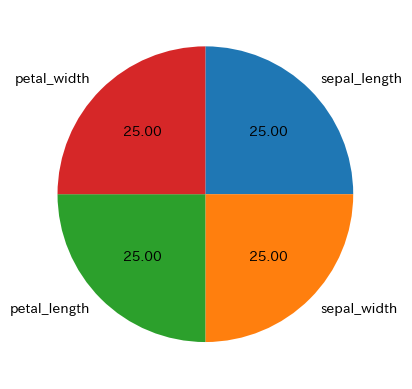

In [71]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
cnt=df["sepal_length"].count(),df["sepal_width"].count(),df["petal_length"].count(),df["petal_width"].count()
lab = 'sepal_length','sepal_width','petal_length','petal_width'
plt.pie(cnt, labels=lab,startangle=90,counterclock=False,autopct="%.2f")
plt.show()

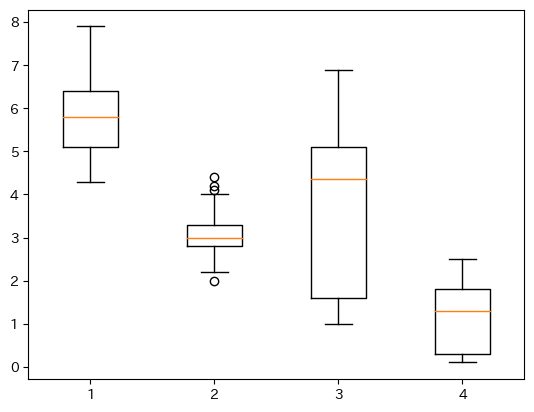

In [74]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
plt.boxplot(X)
plt.show()

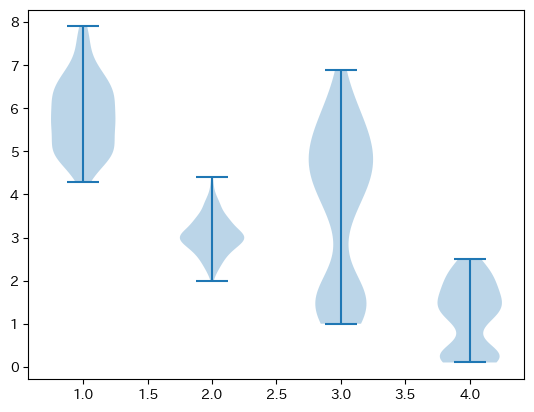

In [75]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
plt.violinplot(X)
plt.show()

箱ひげ図：確率密度はわからない。データの分布に複数の山があるときにわからない  
バイオリンプロット：確率密度がわかるので、データの分布に複数の山があるときには特にわかりやすい

【問題7】特徴量間の関係の確認

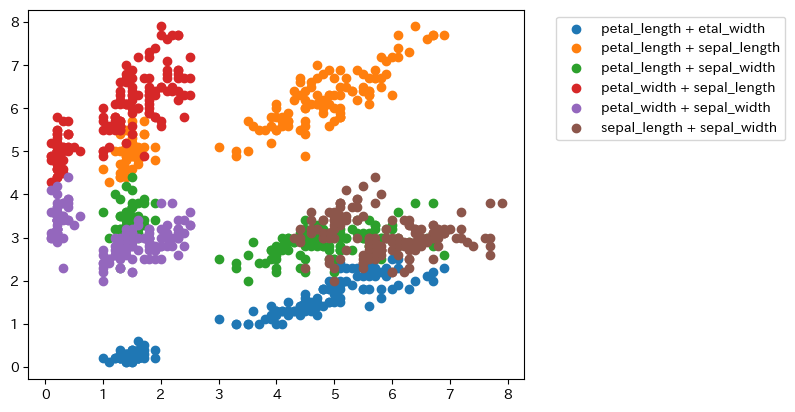

In [84]:
# ４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。

plt.scatter(df['petal_length'],df['petal_width'],label="petal_length + etal_width")
plt.scatter(df['petal_length'],df['sepal_length'],label="petal_length + sepal_length")
plt.scatter(df['petal_length'],df['sepal_width'],label="petal_length + sepal_width")
plt.scatter(df['petal_width'],df['sepal_length'],label="petal_width + sepal_length")
plt.scatter(df['petal_width'],df['sepal_width'],label="petal_width + sepal_width")
plt.scatter(df['sepal_length'],df['sepal_width'],label="sepal_length + sepal_width")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

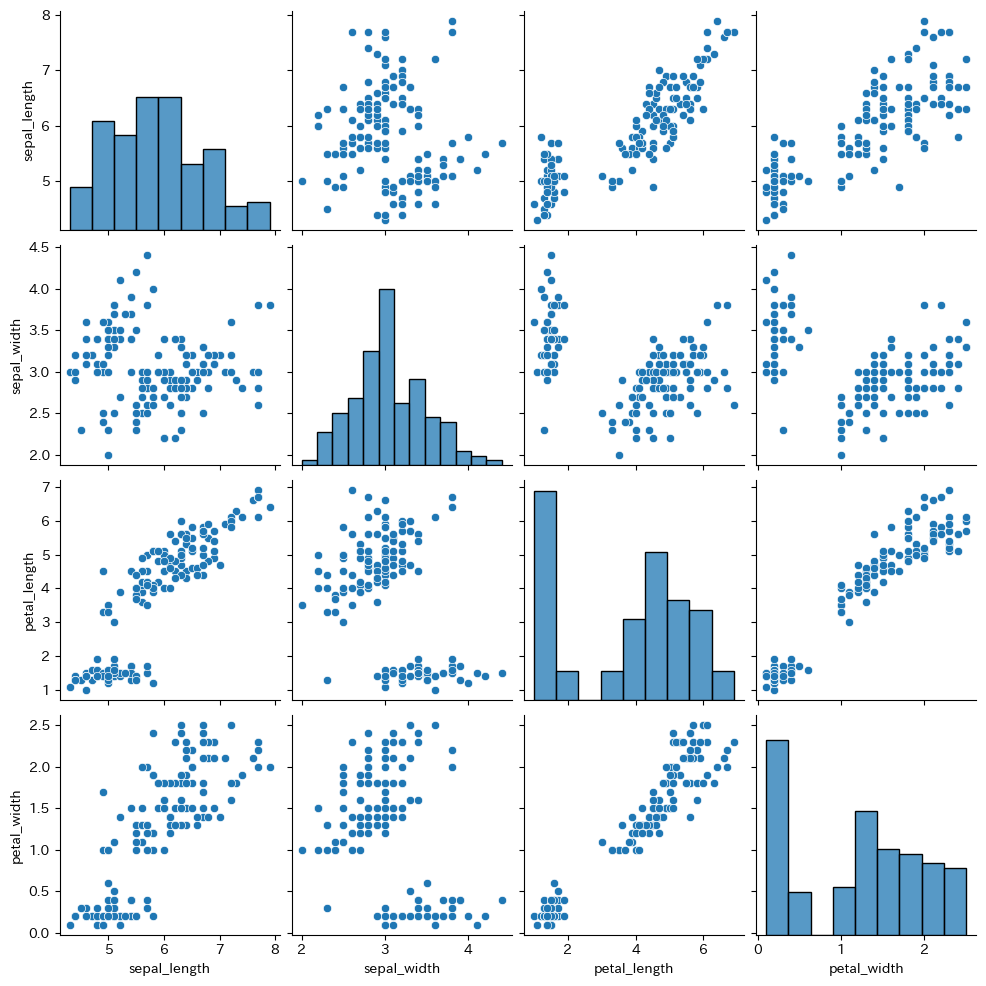

In [88]:
# すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。
sns.pairplot(X)
plt.show()

In [91]:
# ４つの特徴量に関する相関係数行列を作る
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

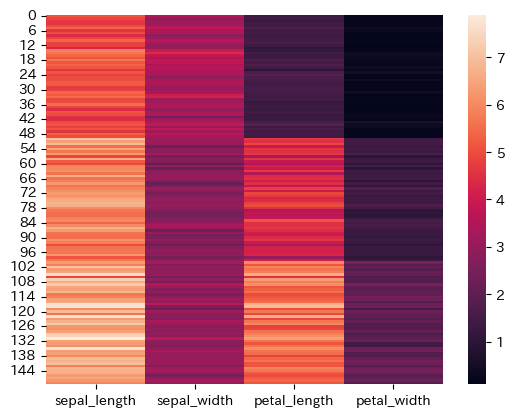

In [93]:
# 相関係数行列のヒートマップを作る(１つ)
sns.heatmap(X)

【問題8】可視化したグラフや表の結果の説明

相関係数ヒートマップから  
petal_widthは係数が全体的に低い。  
逆にsepal_lengthは係数が全体的に高い  
全体的に中間の係数なのは、sepal_widthとなっている